<a href="https://colab.research.google.com/github/sunanda-debnath/Telecom_churn_analysis/blob/main/Telecom_churn_analysis_minor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom Customer Churn Analysis**



With the rapid development of the telecommunications industry, service providers are interested in expanding their customer base. In order to survive in the competitive telecommunications market, retaining existing customers is crucial and the biggest challenge. According to surveys in the telecommunications industry, acquiring new customers is more expensive than retaining existing customers. By using data available from service providers, we can predict whether or not the valued customer
will leave the company. Figuring out how much to spend on acquisition and retention is something of black art.

If too many customers are lost, sales will drop. When too much is spent, margins suffer unduly. But it's a lot of money. Research by Efficient shows that in a mature market, the average service provider typically spends 15-20% of service revenue on procurement activities and customer retention. That's pretty amazing.

McKinsey says that the average CAPEX spend on infrastructure efficient networks and IT is 15 % of sales.




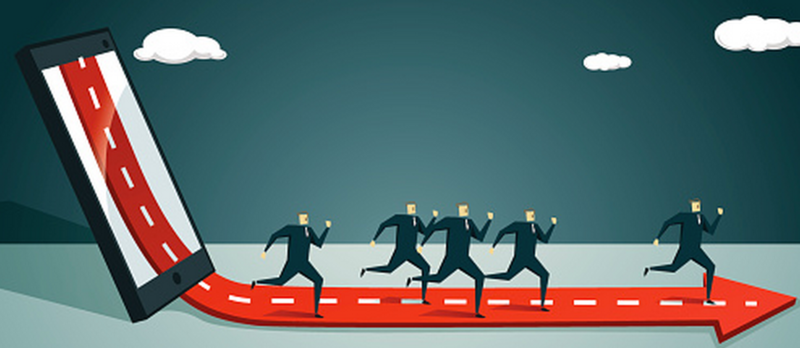

## CONTENT


1.   Domain Exploration

2.   Data Collection and Data Exploration

3.   Data cleaning

4.   Feature Engineering

5.   EDA ( Exploratory Data Analytics ) Data Visualization

6.   Preprocessing of data

7.   Apply ML to build a predictive model

8.   Performance Analysis 

9.   Monitoring the perfomance of a model 








## 1.Domain Exploration

Customer churn is the loss of clients or customers. Predicting churn can help the Telecom company, so it can effectively focus a customer retention marketing program (e.g. a special offer) on the subset of clients who are most likely to change their carrier. Therefore, the “churn” column is chosen as the target and the following predictive analysis is a supervised classification problem.

### Import libreries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
%matplotlib inline
#import matplotlib.figure as fig
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


### 2.Data Collection and Data Exploration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df =pd.read_csv("/content/drive/MyDrive/skillvertex/minor project/Copy of bigml_59c28831336c6604c800002a.csv")

In [ ]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
df.shape

(3333, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [ ]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### 3.Data Cleaning

In [ ]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There is no null value present on the data.



In [ ]:
print(df['international plan'].unique())
print(df['voice mail plan'].unique())

['no' 'yes']
['yes' 'no']


In [ ]:
df.duplicated().sum()

0

No duplicate file present 

In [ ]:
df.skew()

account length            0.096606
area code                 1.126823
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
churn                     2.018356
dtype: float64

### 4.Feature Engineering

In [ ]:
df['number vmail messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: number vmail messages, dtype: float64

In [ ]:
df['number vmail messages'][df['number vmail messages']>0].describe()

count    922.000000
mean      29.277657
std        7.559027
min        4.000000
25%       24.000000
50%       29.000000
75%       34.000000
max       51.000000
Name: number vmail messages, dtype: float64

In [ ]:
df['vmail_messages'] = pd.cut(df['number vmail messages'],bins=[0,1,38,52],
                             labels=['No VM plan','Normal Users','High Frequency users'],
                             include_lowest=True)
df.head(20)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,vmail_messages
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,Normal Users
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,Normal Users
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,No VM plan
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,No VM plan
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,No VM plan
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,False,No VM plan
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,29.62,212.6,118,9.57,7.5,7,2.03,3,False,Normal Users
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,8.76,211.8,96,9.53,7.1,6,1.92,0,False,No VM plan
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False,No VM plan
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,18.87,326.4,97,14.69,11.2,5,3.02,0,False,Normal Users


### 5.EDA

correlation cheak

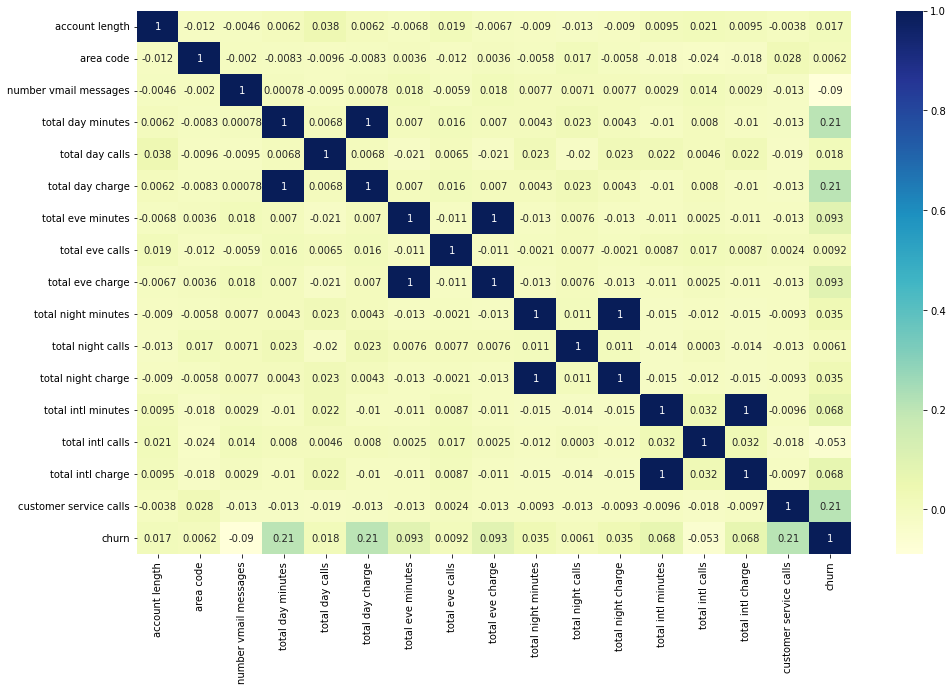

In [ ]:
plt.figure(figsize= (16, 10))
Coorelation_matrix= df.corr()
sns.heatmap(Coorelation_matrix, annot= True, cmap= 'YlGnBu')



Total day minutes & total day charge - correlation 1 >> we can drop one of these
Total eve minutes & total eve charge - correlation 1 >> we can drop one of these
Total night minutes & total night charge - correlation 1 >> we can drop one of these
Total intl minutes & total intl charge - correlation 1 >> we can drop one of these

Outlier cheak

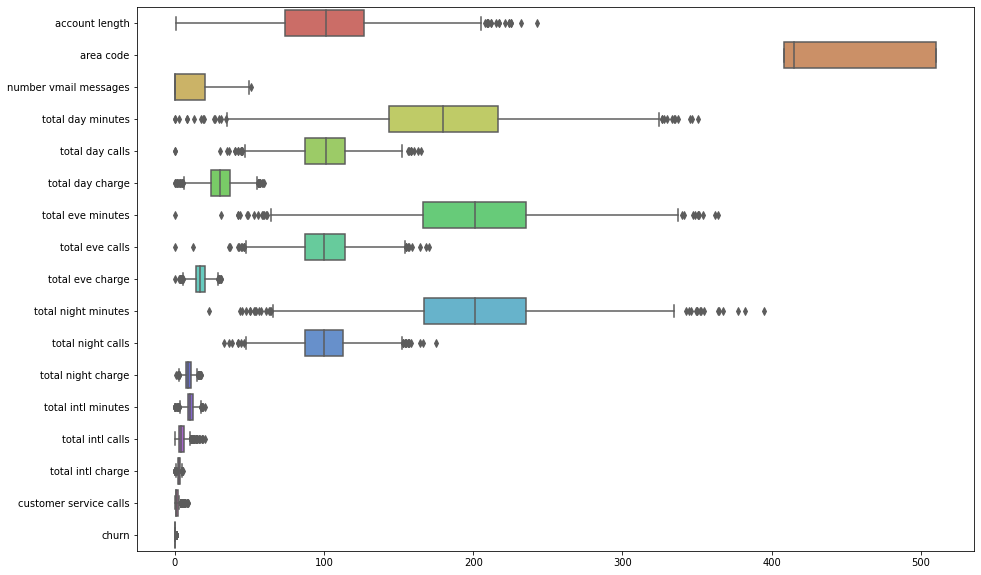

In [ ]:
plt.figure(figsize= (15, 10))
sns.boxplot(data=df, orient="h", palette="hls")

We used ANOVA for comparing the distribution of a numeric variable in two or more groups
Ho = Null Hypothesis = the distribution of the varible in multiple groups is uniform
Ha = Alternate Hypothesis = the distribution of the variable in multiple groups in different

we analyse the pvalue, lets say for confidence interval of 95%, significance level = 5%

if pvalue>0.05 = accept the null hypothesis and the feature is NOT important if pvalue <0.05 = reject the null hypothesis and the feature is important

In [ ]:
numerics =['account length','number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls']
xnum = df[numerics]
y = df['churn']
from sklearn.feature_selection import f_classif
fval,pval = f_classif(xnum,y)
for i in range(len(numerics)):print(numerics[i],pval[i])

account length 0.33976000705720666
number vmail messages 2.1175218402696038e-07
total day minutes 5.300278227509361e-33
total day calls 0.28670102402211844
total day charge 5.30060595239102e-33
total eve minutes 8.011338561256927e-08
total eve calls 0.5941305829720491
total eve charge 8.036524227754477e-08
total night minutes 0.04046648463758881
total night calls 0.7230277872081609
total night charge 0.040451218769160205
total intl minutes 8.05731126549437e-05
total intl calls 0.002274701409850077
total intl charge 8.018753583047257e-05
customer service calls 3.900360240185746e-34


Feature selection using Chi Square Test
Used to compare the distribution of categories of a categorical feature in two or more groups
in nutshell to compare whether a categorical attribute has some relationship with the other categorical attribute

H0 = Null Hypothesis = the categorical attribute has uniform distribution in two or more groups

Ha = Alternate hypothesis = the categorical attribute has different distribution in two or more groups
We always analyse the pvalue, consider 95% as confidence interval, significance level = 5% i.e.0.05

if pvalue >0.05 = accept the Null hypothesis - feature is not important if pvalue <0.05 = reject the Null hypothesis - feature is important

In [ ]:
categories = ['state','area code','phone number', 'international plan',
       'voice mail plan','vmail_messages']

y = df['churn']
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
for col in categories:
    xcat = LabelEncoder().fit_transform(df[col]).reshape(-1,1)
    cval,pval = chi2(xcat,y)
    print(col,pval)

state [0.19214979]
area code [0.89394206]
phone number [1.91173945e-14]
international plan [4.09173473e-46]
voice mail plan [5.28486023e-07]
vmail_messages [0.0396314]


In [ ]:
#selecting important features based on previous analysis
x = df[['international plan','vmail_messages','total day minutes','total eve minutes',
     'total night minutes','total intl minutes','customer service calls']]
y = df['churn']

In [ ]:
#selecting important features based on previous analysis
x = df[['international plan','vmail_messages','total day minutes','total eve minutes',
     'total night minutes','total intl minutes','customer service calls']]
y = df['churn']

###6.Preprocessing the data

In [ ]:
x.head()

,international plan,vmail_messages,total day minutes,total eve minutes,total night minutes,total intl minutes,customer service calls
0,no,Normal Users,265.1,197.4,244.7,10.0,1
1,no,Normal Users,161.6,195.5,254.4,13.7,1
2,no,No VM plan,243.4,121.2,162.6,12.2,0
3,yes,No VM plan,299.4,61.9,196.9,6.6,2
4,yes,No VM plan,166.7,148.3,186.9,10.1,3


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
preprocessor = ColumnTransformer([('ohe',OneHotEncoder(),[1]),
                                ('ode',OrdinalEncoder(),[0]),
                                 ('sc',StandardScaler(),[2,3,4,5,6])],remainder='passthrough')

In [ ]:
x_new = preprocessor.fit_transform(x)
pd.DataFrame(x_new).head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,1.566767,-0.070610,0.866743,-0.085008,-0.427932
1,0.0,0.0,1.0,0.0,-0.333738,-0.108080,1.058571,1.240482,-0.427932
2,0.0,1.0,0.0,0.0,1.168304,-1.573383,-0.756869,0.703121,-1.188218
3,0.0,1.0,0.0,1.0,2.196596,-2.742865,-0.078551,-1.303026,0.332354
4,0.0,1.0,0.0,1.0,-0.240090,-1.038932,-0.276311,-0.049184,1.092641


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_new,y,test_size=0.2,random_state=5)
print(x.shape)
print(xtrain.shape)
print(xtest.shape)
print(y.shape)
print(ytrain.shape)
print(ytest.shape)

(3333, 7)
(2666, 9)
(667, 9)
(3333,)
(2666,)
(667,)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(xtrain,ytrain)

LogisticRegression(class_weight='balanced')

In [ ]:
# performance analysis
from sklearn import metrics
ypred = model.predict(xtest)
print("Accuracy : ",metrics.accuracy_score(ytest,ypred))
print("Recall : ",metrics.recall_score(ytest,ypred))
print("F1 score : ",metrics.f1_score(ytest,ypred))
print("Precision : ",metrics.precision_score(ytest,ypred))

Accuracy :  0.775112443778111
Recall :  0.7934782608695652
F1 score :  0.4932432432432432
Precision :  0.35784313725490197


In [ ]:
# performance analysis on train data
ypred2 = model.predict(xtrain)
print("Accuracy : ",metrics.accuracy_score(ytrain,ypred2))
print("Recall : ",metrics.recall_score(ytrain,ypred2))
print("F1 score : ",metrics.f1_score(ytrain,ypred2))
print("Precision : ",metrics.precision_score(ytrain,ypred2))

Accuracy :  0.764066016504126
Recall :  0.7570332480818415
F1 score :  0.4848484848484849
Precision :  0.3566265060240964


Observation - Recall is not satisfactory
So we will now try other algorithms.